# Loading the HDSR models
## These models are created using Convolutional Neural Network

In [1]:
from keras.models import model_from_json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import cv2
from time import sleep
from numpy import *

d:\python362_64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Loading the exixting model and its weights 

In [193]:
model_dir = "best/model1"

with open(model_dir+".json", "r") as json_file:
    model = model_from_json(json_file.read())

# Load weights into the new model
model.load_weights(model_dir+".h5")
print("Model from '"+model_dir+"' loaded from disk fine")

Model from 'best/model1' loaded from disk fine


### Plotting images and letting the model to predict

d:\python362_64\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  app.launch_new_instance()


PREDICTIONS


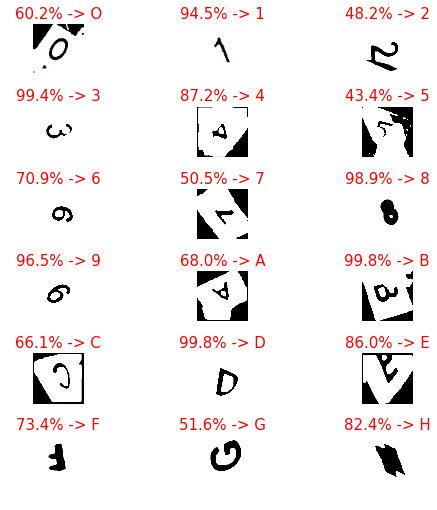

In [211]:
img_rows, img_cols = 100,100
names = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
list_pred = []
list_images = []

for i in range (0, 18):
    test_image = cv2.imread('alsamp/pics ('+str(i)+').jpg')
    test_image=cv2.resize(test_image,(img_rows,img_cols))
    list_images.append(test_image)
    test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
    test_image = np.array(test_image)
    test_image = test_image.astype('float32')
    test_image /= 255
    #print(test_image.shape)

    test_image = np.expand_dims(test_image, axis = 3)
    test_image = np.expand_dims(test_image, axis = 0)
    #print(test_image.shape)
        
    #print((model.predict(test_image)))
    #print(model.predict_classes(test_image))
    #print(names[int(model.predict_classes(test_image))])
    list_pred.append(str(round(model.predict(test_image).max()*100, 1)) +'% -> '+ str(names[int(model.predict_classes(test_image))]))
    #print(model.predict(test_image).max())
#endfor

row,col = 6,3
f, axarr = plt.subplots(row,col,figsize=(7,7))
print("PREDICTIONS")
f.tight_layout()

z = 0
for i in range(0,row):
    for j in range(0,col):
        axarr[i,j].imshow(list_images[z]), axarr[i,j].set_title(list_pred[z], color='r', size=15), axarr[i,j].axis('off')
        z+=1
    #endfor
#endfor

plt.show()